
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [6]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [7]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

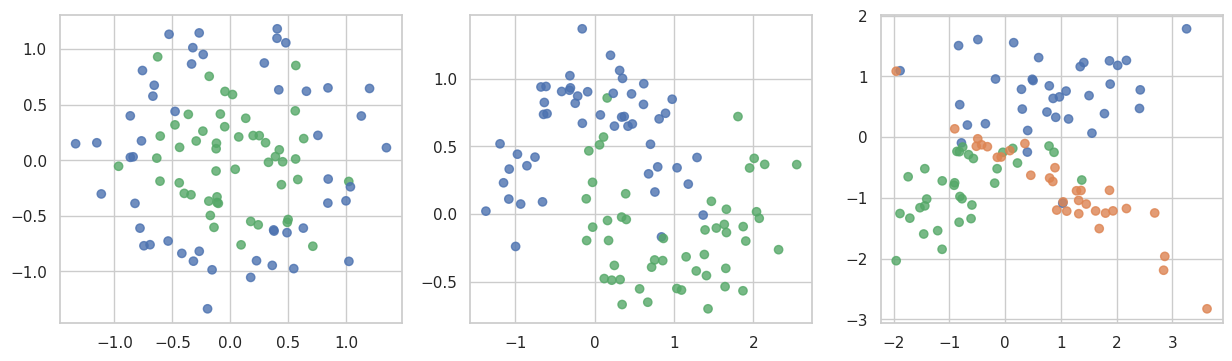

In [8]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [9]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

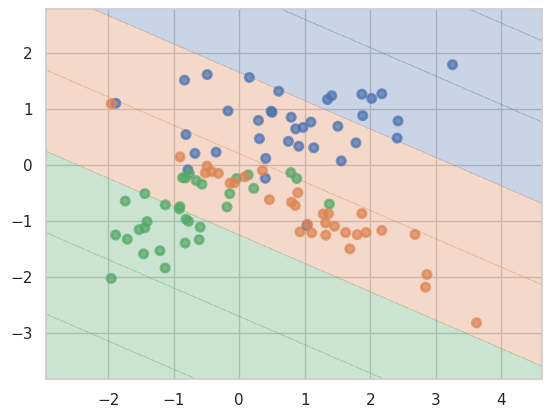

In [10]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1
Train Accuracy: 1.00
Test Accuracy: 0.90


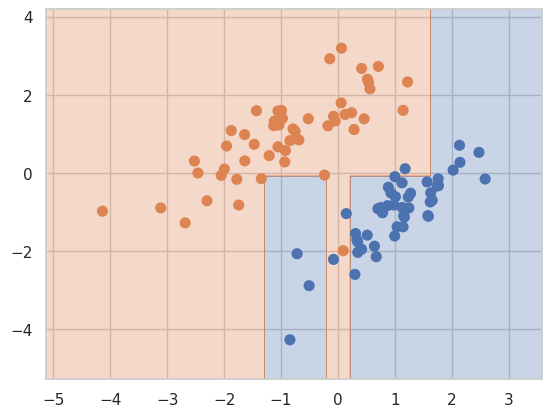

Dataset 2
Train Accuracy: 1.00
Test Accuracy: 0.90


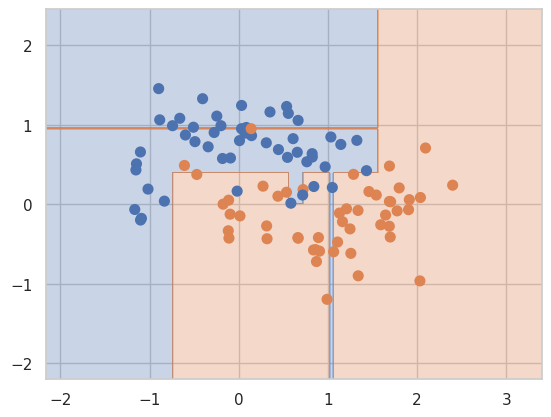

Dataset 3
Train Accuracy: 1.00
Test Accuracy: 0.93


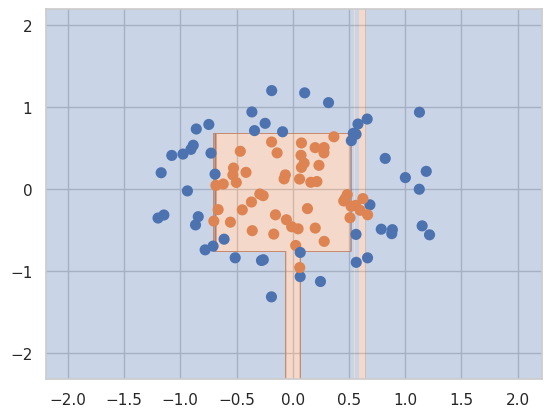

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification, make_moons, make_circles

def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors=np.array(palette)[y], linewidths=2
    )
    plt.show()

datasets = [
    make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1),
    make_moons(n_samples=100, noise=0.3),
    make_circles(n_samples=100, noise=0.2, factor=0.5)
]
for i, (X, y) in enumerate(datasets):
    print(f"Dataset {i+1}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")

    plot_surface(clf, X, y)

__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset 1
Max depth: 2, Min samples leaf: 1
Train Accuracy: 0.91, Test Accuracy: 0.63


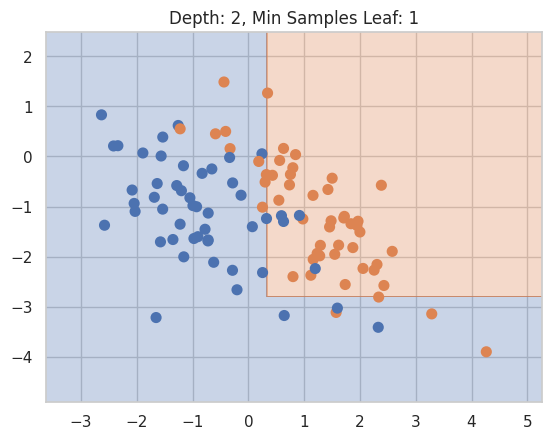

Max depth: 2, Min samples leaf: 5
Train Accuracy: 0.90, Test Accuracy: 0.60


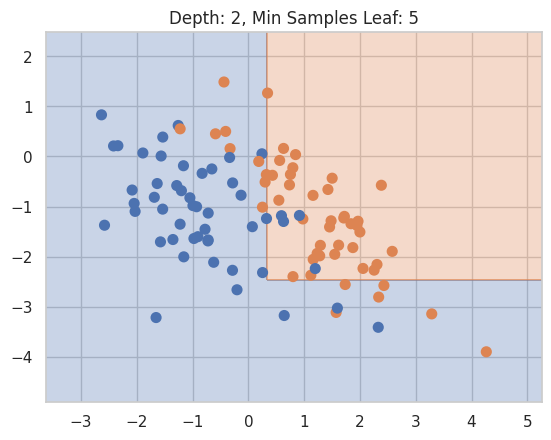

Max depth: 2, Min samples leaf: 10
Train Accuracy: 0.89, Test Accuracy: 0.73


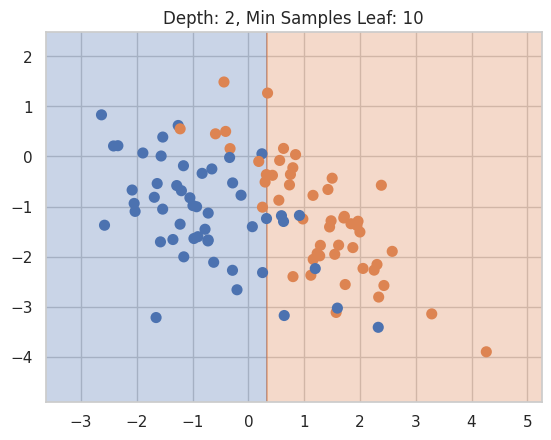

Max depth: 4, Min samples leaf: 1
Train Accuracy: 1.00, Test Accuracy: 0.70


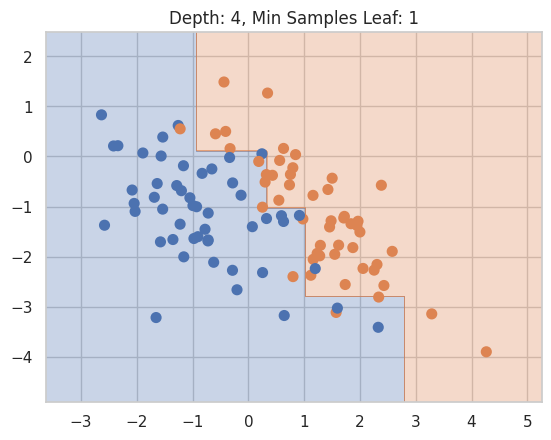

Max depth: 4, Min samples leaf: 5
Train Accuracy: 0.90, Test Accuracy: 0.60


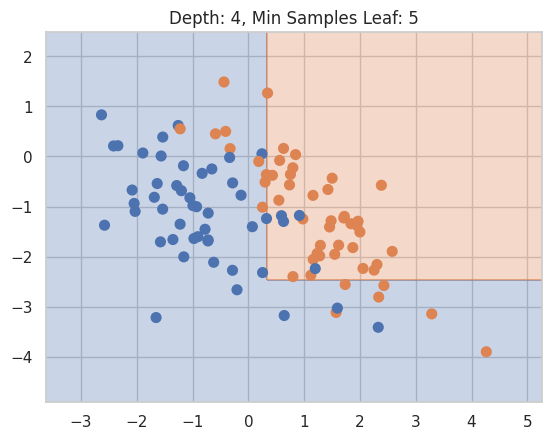

Max depth: 4, Min samples leaf: 10
Train Accuracy: 0.89, Test Accuracy: 0.73


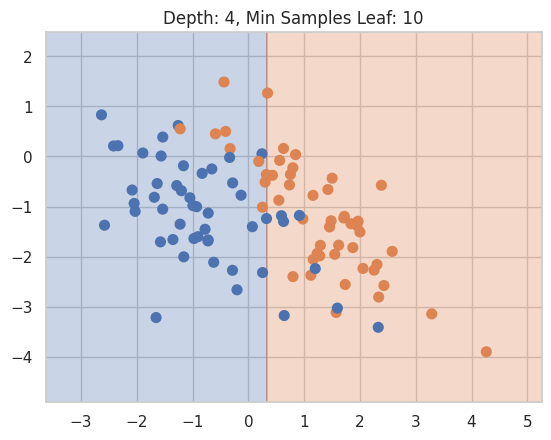

Max depth: 6, Min samples leaf: 1
Train Accuracy: 1.00, Test Accuracy: 0.70


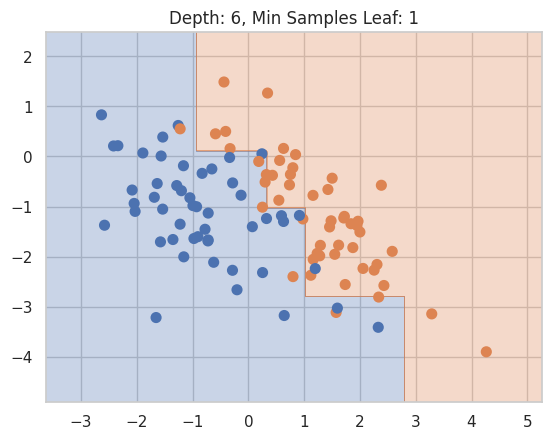

Max depth: 6, Min samples leaf: 5
Train Accuracy: 0.90, Test Accuracy: 0.60


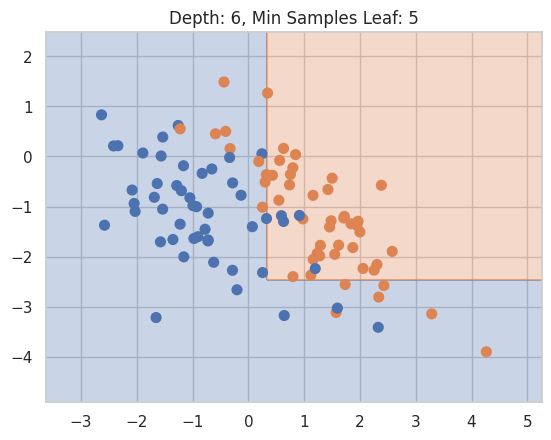

Max depth: 6, Min samples leaf: 10
Train Accuracy: 0.89, Test Accuracy: 0.73


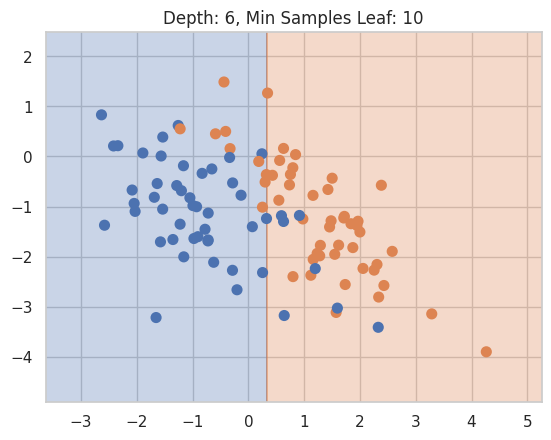

Max depth: None, Min samples leaf: 1
Train Accuracy: 1.00, Test Accuracy: 0.70


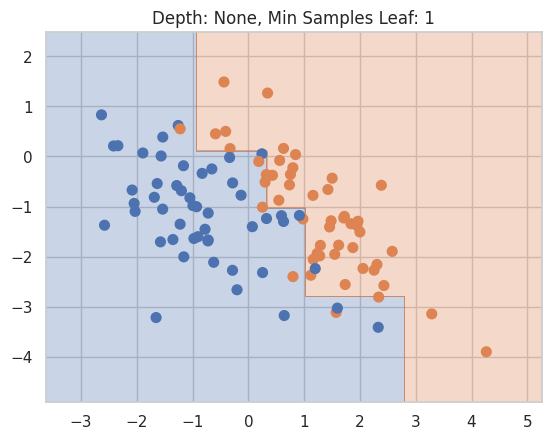

Max depth: None, Min samples leaf: 5
Train Accuracy: 0.90, Test Accuracy: 0.60


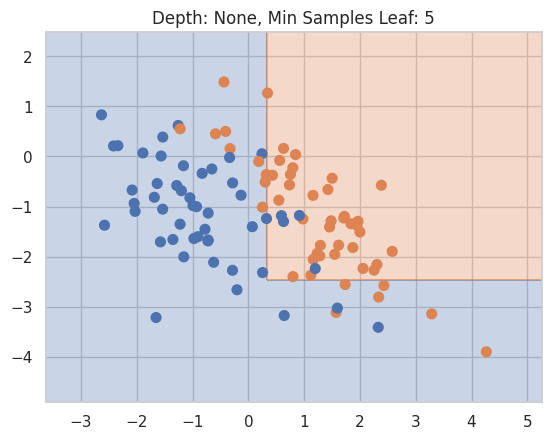

Max depth: None, Min samples leaf: 10
Train Accuracy: 0.89, Test Accuracy: 0.73


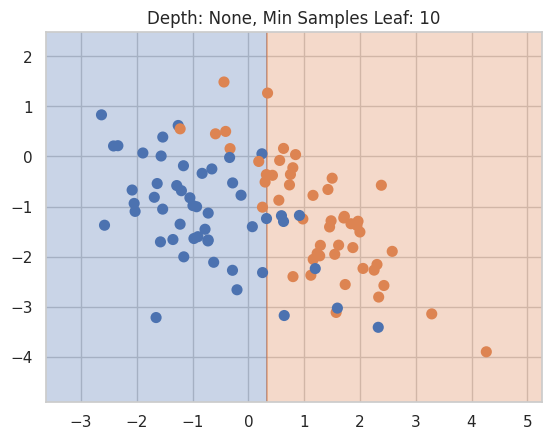

Dataset 2
Max depth: 2, Min samples leaf: 1
Train Accuracy: 0.93, Test Accuracy: 0.80


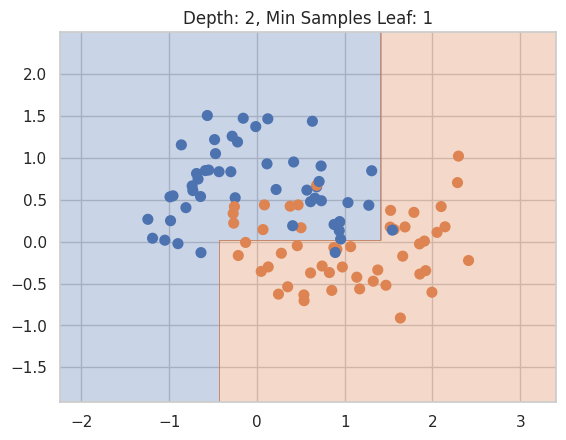

Max depth: 2, Min samples leaf: 5
Train Accuracy: 0.91, Test Accuracy: 0.77


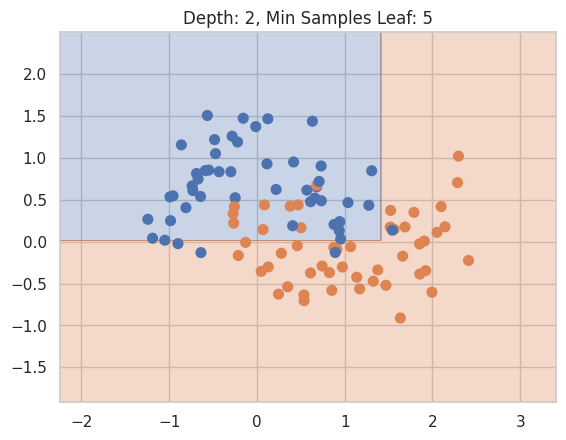

Max depth: 2, Min samples leaf: 10
Train Accuracy: 0.91, Test Accuracy: 0.77


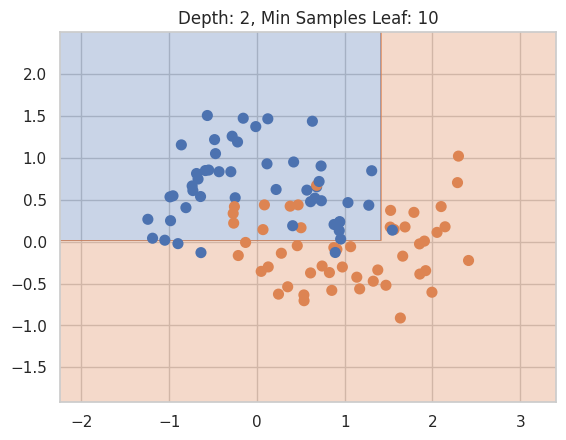

Max depth: 4, Min samples leaf: 1
Train Accuracy: 0.99, Test Accuracy: 0.80


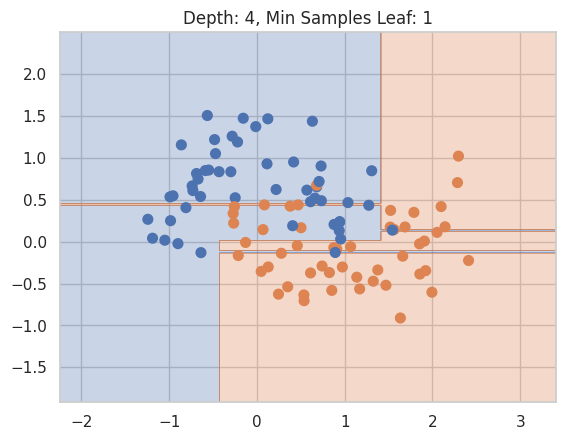

Max depth: 4, Min samples leaf: 5
Train Accuracy: 0.91, Test Accuracy: 0.77


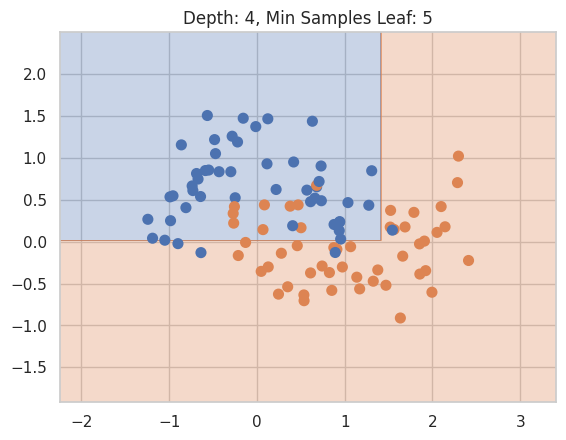

Max depth: 4, Min samples leaf: 10
Train Accuracy: 0.91, Test Accuracy: 0.77


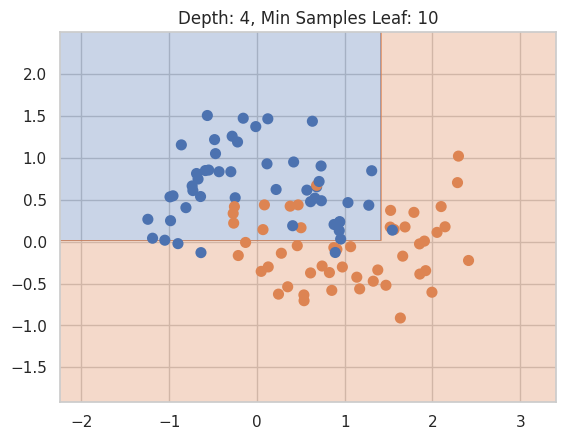

Max depth: 6, Min samples leaf: 1
Train Accuracy: 1.00, Test Accuracy: 0.90


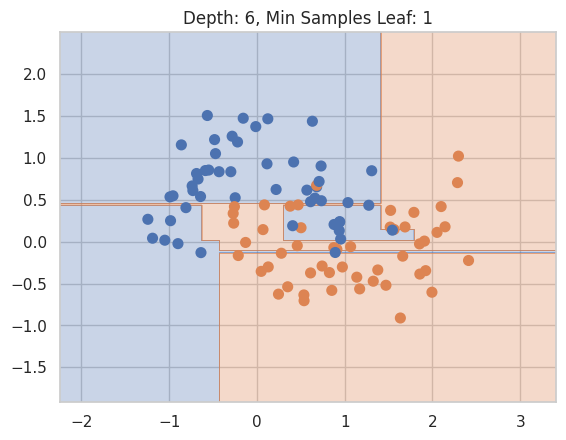

Max depth: 6, Min samples leaf: 5
Train Accuracy: 0.91, Test Accuracy: 0.77


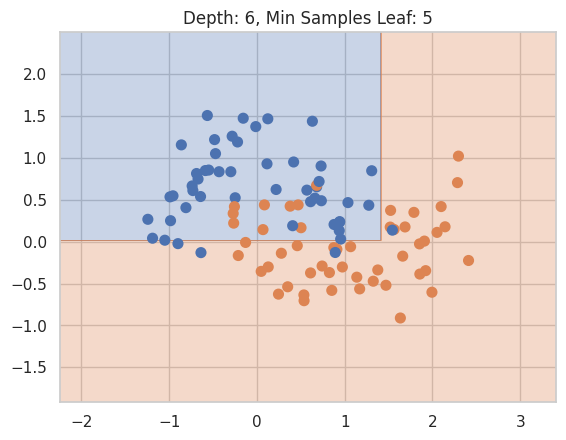

Max depth: 6, Min samples leaf: 10
Train Accuracy: 0.91, Test Accuracy: 0.77


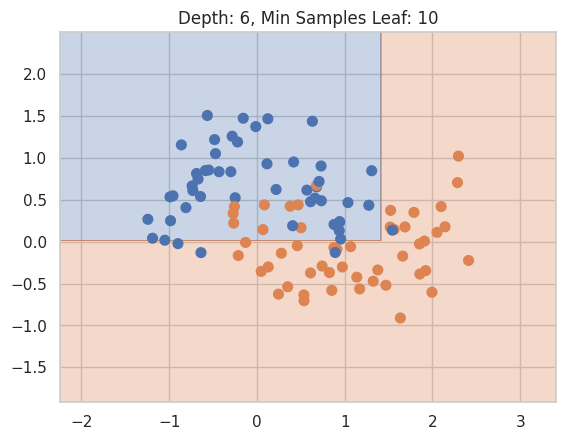

Max depth: None, Min samples leaf: 1
Train Accuracy: 1.00, Test Accuracy: 0.90


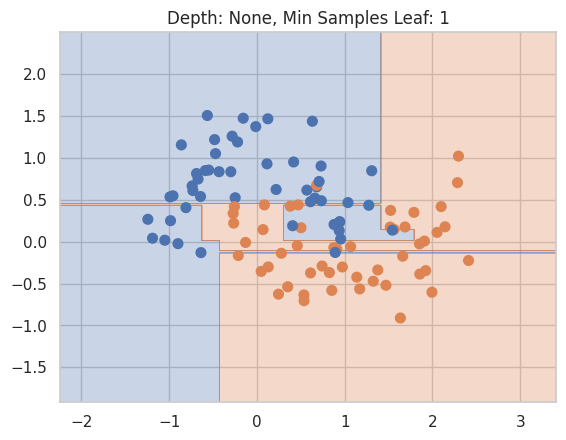

Max depth: None, Min samples leaf: 5
Train Accuracy: 0.91, Test Accuracy: 0.77


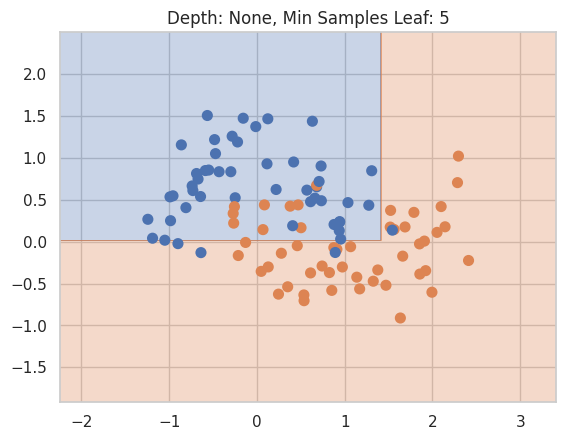

Max depth: None, Min samples leaf: 10
Train Accuracy: 0.91, Test Accuracy: 0.77


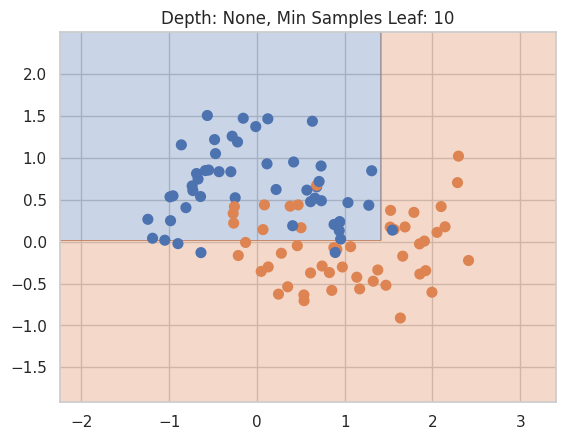

Dataset 3
Max depth: 2, Min samples leaf: 1
Train Accuracy: 0.79, Test Accuracy: 0.67


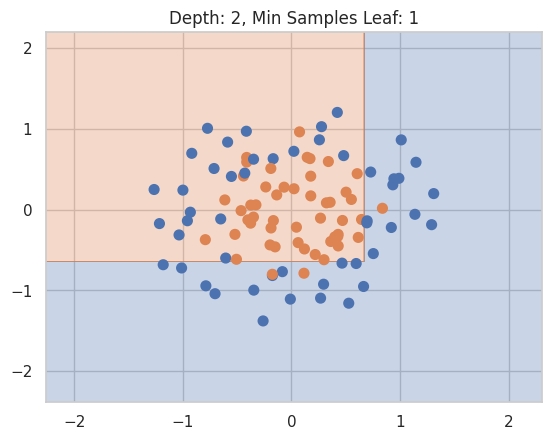

Max depth: 2, Min samples leaf: 5
Train Accuracy: 0.79, Test Accuracy: 0.67


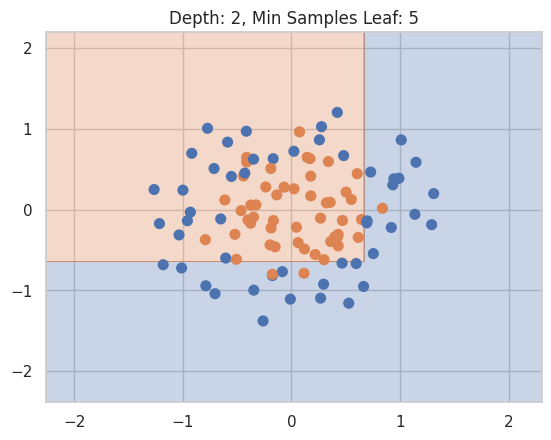

Max depth: 2, Min samples leaf: 10
Train Accuracy: 0.79, Test Accuracy: 0.67


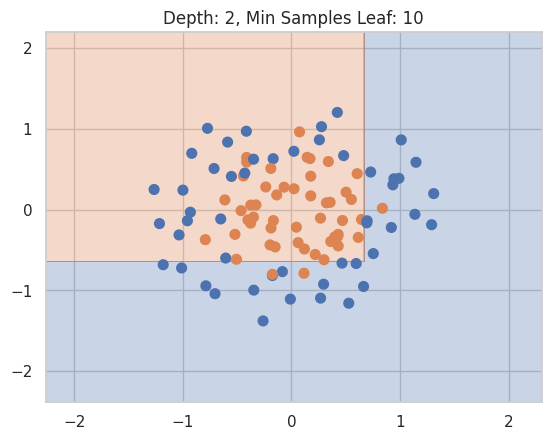

Max depth: 4, Min samples leaf: 1
Train Accuracy: 0.97, Test Accuracy: 0.77


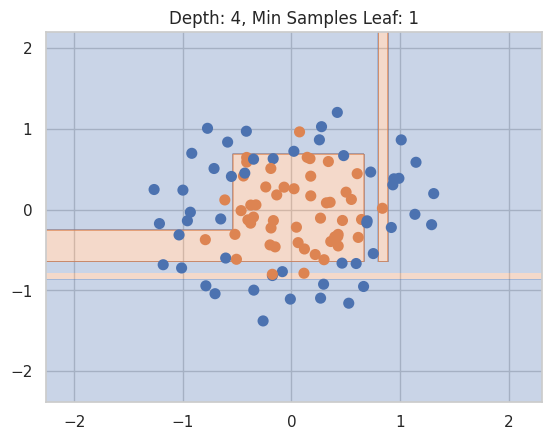

Max depth: 4, Min samples leaf: 5
Train Accuracy: 0.93, Test Accuracy: 0.83


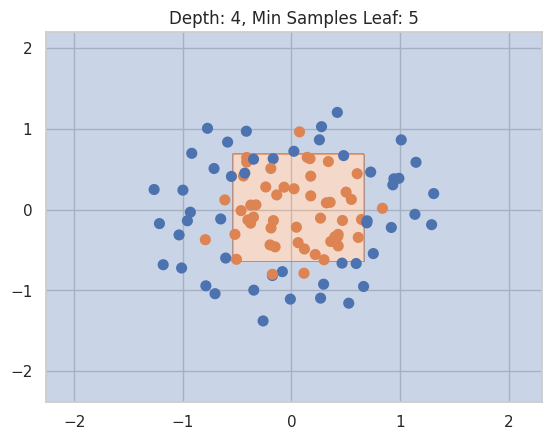

Max depth: 4, Min samples leaf: 10
Train Accuracy: 0.87, Test Accuracy: 0.73


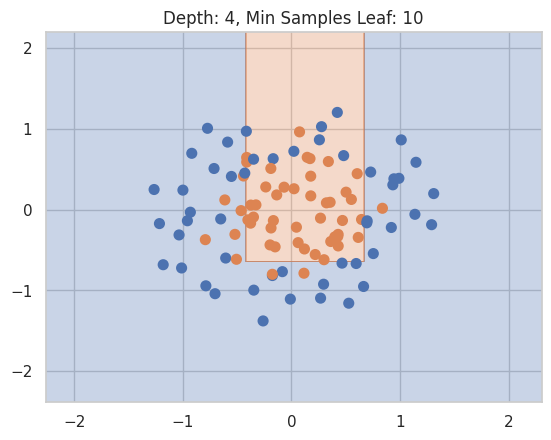

Max depth: 6, Min samples leaf: 1
Train Accuracy: 1.00, Test Accuracy: 0.73


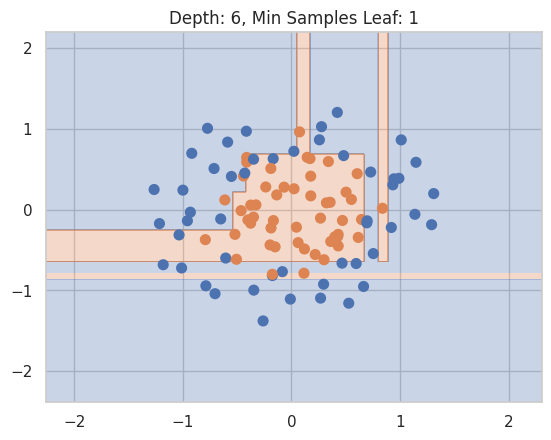

Max depth: 6, Min samples leaf: 5
Train Accuracy: 0.93, Test Accuracy: 0.83


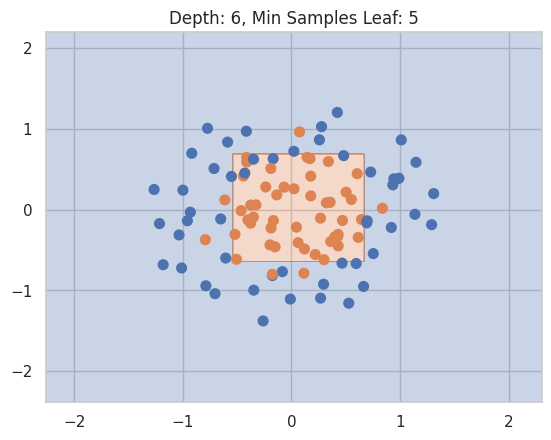

Max depth: 6, Min samples leaf: 10
Train Accuracy: 0.87, Test Accuracy: 0.73


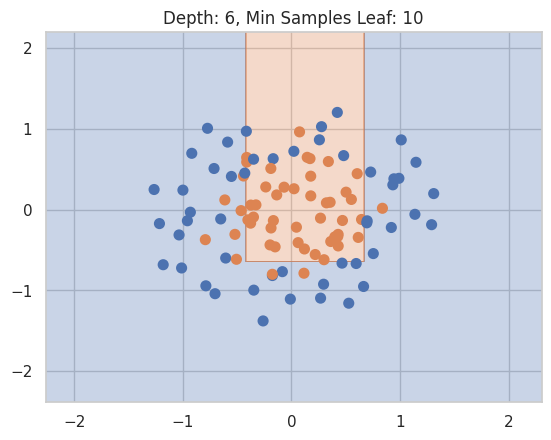

Max depth: None, Min samples leaf: 1
Train Accuracy: 1.00, Test Accuracy: 0.73


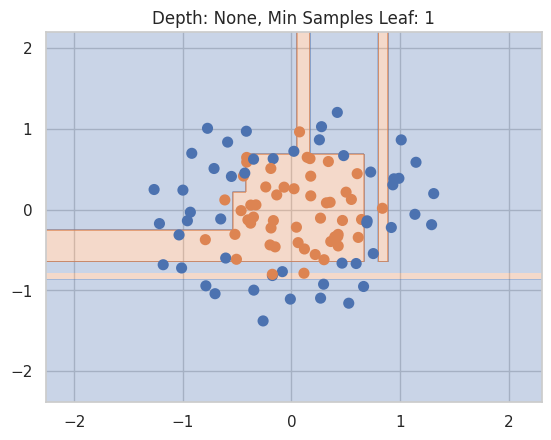

Max depth: None, Min samples leaf: 5
Train Accuracy: 0.93, Test Accuracy: 0.83


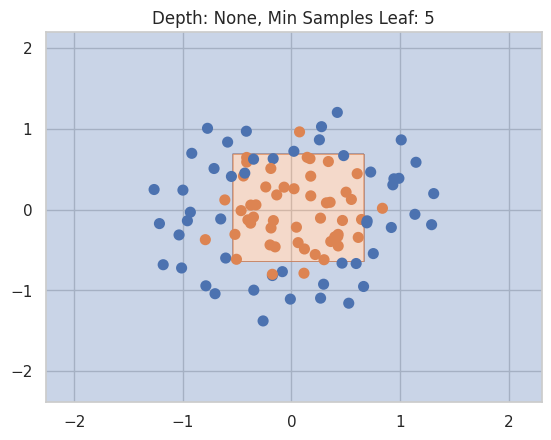

Max depth: None, Min samples leaf: 10
Train Accuracy: 0.87, Test Accuracy: 0.73


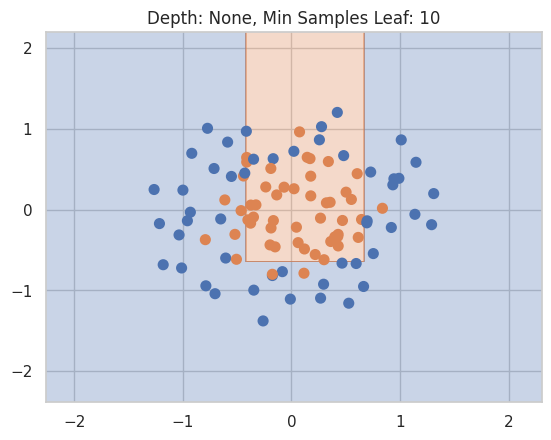

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification, make_moons, make_circles

def plot_surface(clf, X, y, title):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors=np.array(palette)[y], linewidths=2
    )
    plt.title(title)
    plt.show()

datasets = [
    make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1),
    make_moons(n_samples=100, noise=0.3),
    make_circles(n_samples=100, noise=0.2, factor=0.5)
]


max_depths = [2, 4, 6, None]
min_samples_leafs = [1, 5, 10]

for i, (X, y) in enumerate(datasets):
    print(f"Dataset {i+1}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)

            train_accuracy = accuracy_score(y_train, clf.predict(X_train))
            test_accuracy = accuracy_score(y_test, clf.predict(X_test))

            print(f"Max depth: {max_depth}, Min samples leaf: {min_samples_leaf}")
            print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

            plot_surface(clf, X, y, f"Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf}")


__Ответ:__ Маленькие значения max_depth и большие значения min_samples_leaf приведят к простым моделям, которые могут не справляются со сложными данными (недообучение).
Большие значения max_depth и маленькие значения min_samples_leaf сделают модель сложной, что может привести к переобучению.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

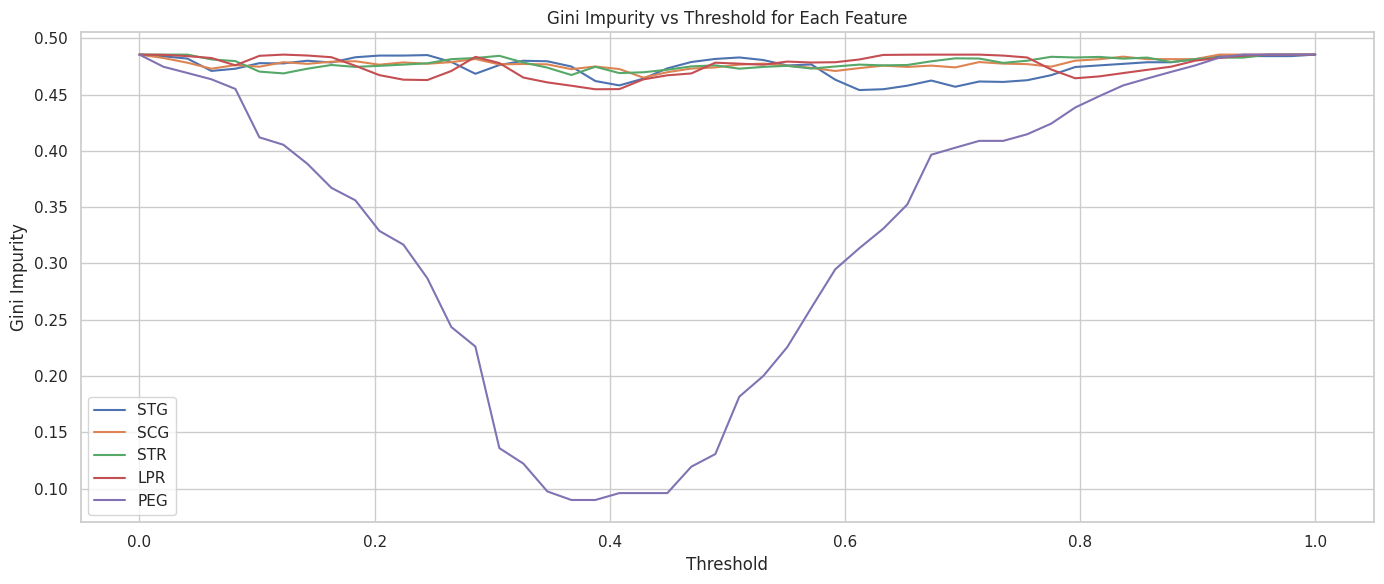

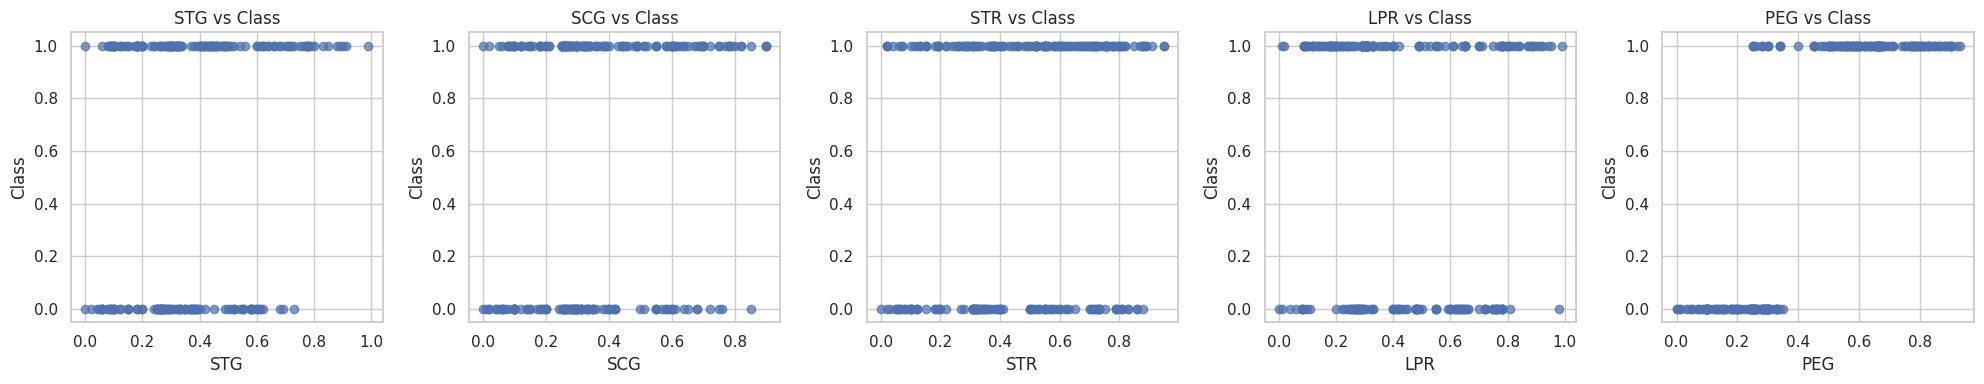

In [90]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('students.csv')
df.head()

features = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
target = 'UNS'

def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return 1 - np.sum(probs ** 2)

thresholds = np.linspace(0, 1, 50)
gini_impurities = {feature: [] for feature in features}

for feature in features:
    for threshold in thresholds:
        y_pred = (df[feature] >= threshold).astype(int)
        gini_impurity_left = gini_impurity(df[target][df[feature] >= threshold])
        gini_impurity_right = gini_impurity(df[target][df[feature] < threshold])
        weight_left = np.mean(df[feature] >= threshold)
        weight_right = 1 - weight_left
        weighted_gini_impurity = weight_left * gini_impurity_left + weight_right * gini_impurity_right
        gini_impurities[feature].append(weighted_gini_impurity)

plt.figure(figsize=(14, 6))

for feature in features:
    plt.plot(thresholds, gini_impurities[feature], label=f'{feature}')

plt.title('Gini Impurity vs Threshold for Each Feature')
plt.xlabel('Threshold')
plt.ylabel('Gini Impurity')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i, feature in enumerate(features):
    axs[i].scatter(df[feature], df[target], alpha=0.7)
    axs[i].set_title(f'{feature} vs Class')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Class')

plt.tight_layout()
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** Разделение выборки на два поддерева следует проводить по признаку PEG, поскольку такое разбиение соответствует визуализации на scatter-графиках. Графики "хороших" признаков обычно имеют гауссовидную форму и показывают высокие значения коэффициента Джинни, в то время как графики "слабых" признаков имеют схожую форму и низкие значения коэффициента Джинни.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




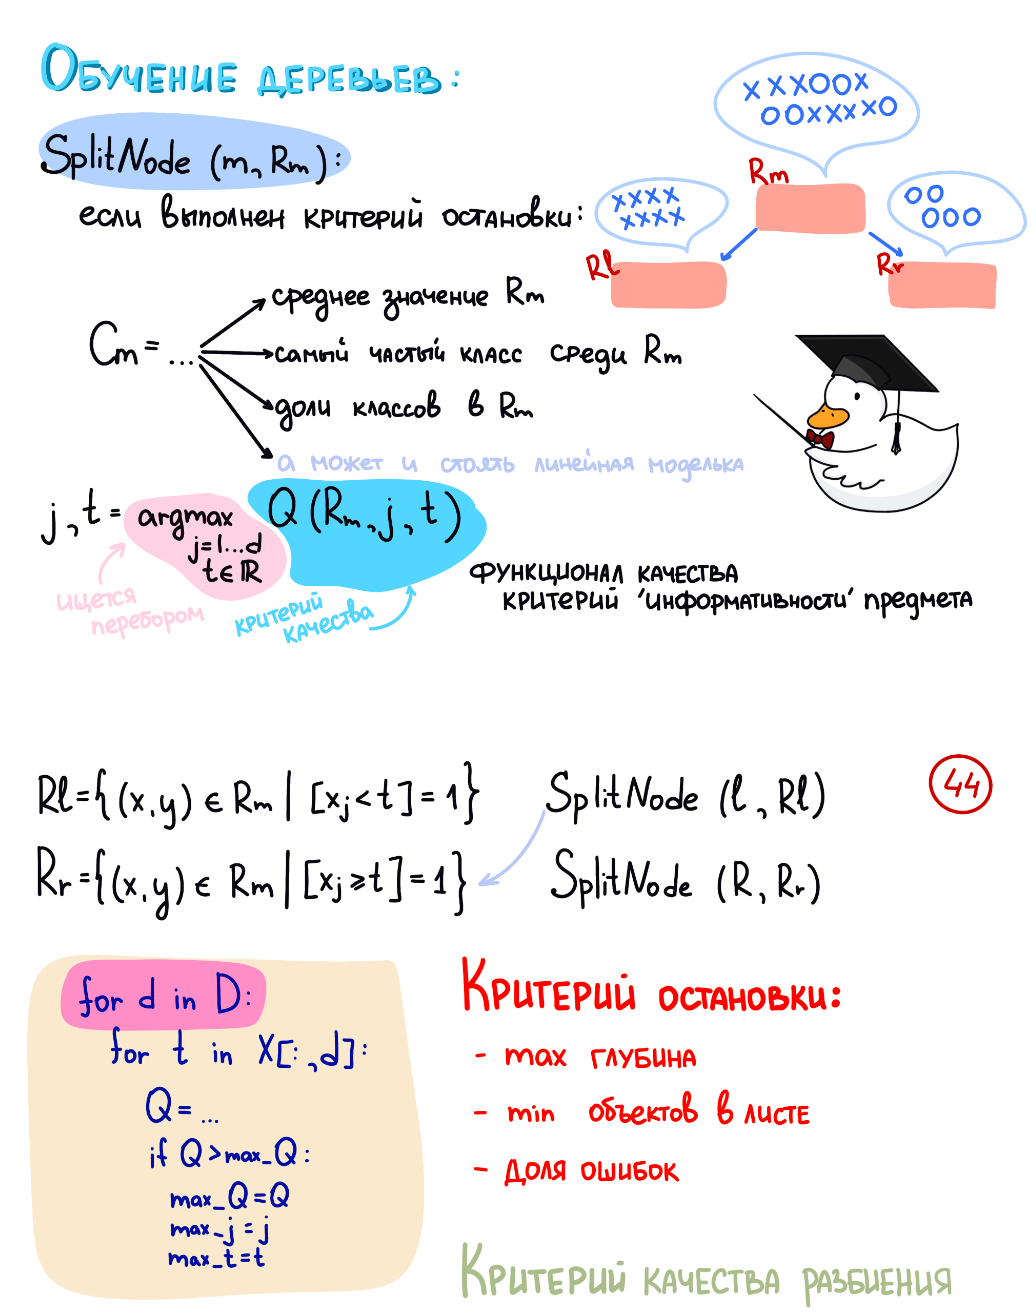

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [84]:
from collections import Counter
import numpy as np

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        if any(ft not in {"real", "categorical"} for ft in feature_types):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth):
        if np.all(sub_y == sub_y[0]) or len(sub_y) < self._min_samples_split or (self._max_depth is not None and depth == self._max_depth):
            node['type'] = 'terminal'
            node['class'] = Counter(sub_y).most_common(1)[0][0]
            return

        best_feature, best_value, best_gini = None, None, float('inf')
        num_features = sub_X.shape[1]

        for feature in range(num_features):
            feature_type = self._feature_types[feature]
            unique_values = np.unique(sub_X[:, feature])

            for value in unique_values:
                if self._is_valid_split(sub_X, feature, value):
                    gini = self._calculate_gini(sub_X, sub_y, feature, value)
                    if gini < best_gini:
                        best_feature, best_value, best_gini = feature, value, gini

        if best_feature is not None:
            node['type'] = 'nonterminal'
            node['feature_split'] = best_feature
            node['threshold'] = best_value
            node['left_child'], node['right_child'] = {}, {}

            left_indices = self._split_indices(sub_X, best_feature, best_value)
            self._fit_node(sub_X[left_indices], sub_y[left_indices], node['left_child'], depth + 1)
            self._fit_node(sub_X[~left_indices], sub_y[~left_indices], node['right_child'], depth + 1)

    def _is_valid_split(self, X, feature, value):
        split = (X[:, feature] == value) if self._feature_types[feature] == 'categorical' else (X[:, feature] < value)
        return np.sum(split) >= self._min_samples_leaf and np.sum(~split) >= self._min_samples_leaf

    def _calculate_gini(self, X, y, feature, value):
        split = (X[:, feature] == value) if self._feature_types[feature] == 'categorical' else (X[:, feature] < value)
        left_gini = self._gini(y[split])
        right_gini = self._gini(y[~split])
        left_weight = np.sum(split) / len(X)
        right_weight = np.sum(~split) / len(X)
        return left_gini * left_weight + right_gini * right_weight

    def _split_indices(self, X, feature, value):
        return (X[:, feature] == value) if self._feature_types[feature] == 'categorical' else (X[:, feature] < value)

    def _gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def _predict_node(self, x, node):
        if node['type'] == 'terminal':
            return node['class']

        feature_value = x[node['feature_split']]
        if self._feature_types[node['feature_split']] == 'categorical':
            if feature_value == node['threshold']:
                return self._predict_node(x, node['left_child'])
            else:
                return self._predict_node(x, node['right_child'])
        else:
            if feature_value < node['threshold']:
                return self._predict_node(x, node['left_child'])
            else:
                return self._predict_node(x, node['right_child'])

    def fit(self, X, y):
        self._tree = {}
        self._fit_node(np.array(X), np.array(y), self._tree, 0)
        return self

    def predict(self, X):
        return np.array([self._predict_node(x, self._tree) for x in np.array(X)])

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

    def get_params(self, deep=True):
        return {
            'feature_types': self._feature_types,
            'max_depth': self._max_depth,
            'min_samples_split': self._min_samples_split,
            'min_samples_leaf': self._min_samples_leaf
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

In [85]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('agaricus-lepiota.data', header=None)
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]
df.columns = column_names


for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X.shape[1]
tree = DecisionTree(feature_types)
tree.fit(X_train.values, y_train.values)

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 1.0000


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [88]:
mushrooms = df

tic_tac_toe = pd.read_csv('tic-tac-toe-endgame.csv', header=None)

cars = pd.read_csv('car.data', header=None)
cars.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
nursery = pd.read_csv('nursery.data', header=None)
nursery.columns = ["parents", "has_nurs", "form", "children", "housing", "finance","social","health", "class"]


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [87]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

def encode_labels(df):
    le = LabelEncoder()
    df_encoded = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)
    return df_encoded

def one_hot(X):
    onehot_encoder = OneHotEncoder(sparse=False)
    return onehot_encoder.fit_transform(X)

def prepare_data(df, target_col):
    if isinstance(target_col, int):
        target_col_name = df.columns[target_col]
    else:
        target_col_name = target_col

    X = df.drop(columns=[target_col_name])
    y = df[target_col_name]
    X_encoded = encode_labels(X)
    y_encoded = LabelEncoder().fit_transform(y)
    return X_encoded, y_encoded

datasets = {
    'mushrooms': (mushrooms, 'class'),
    'tic_tac_toe': (tic_tac_toe, -1),
    'cars': (cars, 'class'),
    'nursery': (nursery, 'class')
}

encoded_data = {}
for name, (df, target) in datasets.items():
    X, y = prepare_data(df, target)
    encoded_data[name] = (X, y)

results = pd.DataFrame(columns=[
    'DecisionTree (All Features as Numeric)',
    'DecisionTree (Categorical Features)',
    'DecisionTree (Numeric + One-Hot Encoding)',
    'DecisionTreeClassifier'
])


scorer = make_scorer(accuracy_score)


for name, (X, y) in encoded_data.items():
    accuracies = {}

    dt_all_numeric = DecisionTree(feature_types=['real'] * X.shape[1])
    accuracies['DecisionTree (All Features as Numeric)'] = cross_val_score(dt_all_numeric, X, y, cv=10, scoring=scorer).mean()

    dt_categorical = DecisionTree(feature_types=['categorical'] * X.shape[1])
    accuracies['DecisionTree (Categorical Features)'] = cross_val_score(dt_categorical, X, y, cv=10, scoring=scorer).mean()

    ct = ColumnTransformer(
        transformers=[('onehot', OneHotEncoder(sparse=False), list(range(X.shape[1])))],
        remainder='passthrough'
    )
    dt_one_hot = Pipeline(steps=[('preprocessor', ct), ('classifier', DecisionTree(feature_types=['real'] * one_hot(X).shape[1]))])
    accuracies['DecisionTree (Numeric + One-Hot Encoding)'] = cross_val_score(dt_one_hot, X, y, cv=10, scoring=scorer).mean()

    dt_sklearn = DecisionTreeClassifier()
    accuracies['DecisionTreeClassifier'] = cross_val_score(dt_sklearn, X, y, cv=10, scoring=scorer).mean()

    results.loc[name] = accuracies

print(results)


             DecisionTree (All Features as Numeric)  \
mushrooms                                  0.999261   
tic_tac_toe                                0.499167   
cars                                       0.912559   
nursery                                    0.902006   

             DecisionTree (Categorical Features)  \
mushrooms                               0.999631   
tic_tac_toe                             0.596053   
cars                                    0.861739   
nursery                                 0.850926   

             DecisionTree (Numeric + One-Hot Encoding)  DecisionTreeClassifier  
mushrooms                                     0.999631                0.956689  
tic_tac_toe                                        NaN                0.762423  
cars                                          0.861739                0.865268  
nursery                                       0.850926                0.812654  


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


Результаты показывают, что алгоритмы DecisionTree ведут себя по-разному в зависимости от набора данных. DecisionTree (Categorical Features) хорошо справляется с категориальными данными, например, с mushrooms, тогда как DecisionTree (All Features as Numeric) лучше работает с числовыми данными, как в cars. Различия в производительности могут быть вызваны особенностями данных и случайными вариациями

# Как дела?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ